**Задача**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
Чтобы бороться с оттоком, необходимо провести анализ и подготовить план действий по удержанию клиентов.

А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

**Описание данных**

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

#### Изучение данных

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**Вывод**

Пропусков и дубликатов в данных нет, типы корректны.

#### Исследовательский анализ данных

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


По данным таблицы видим, что большое стандартное отклоение есть в признаках 'contract_period', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month'. Это говорит о том, что в данных показателях есть выбросы.

In [7]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


По средним значениям признаков видим, что в отток чаще попадают следубщие категории клиентов: 
- те, кто живет дальше от Фитнес-клуба;
- кто не явяляется сотрудником компании-партнёр;
- кто не был записан в рамках акции «приведи друга»;
- с небольшой длительность текущего действующего абонемента;
- кто реже ходит на групповые занятия;
- кто меньше тратит на доп.услуги;
- кто ходит в клуб меньше времени с момента первого обращения;
- кто реже ходит в Фитнес-клуб.

In [8]:
# разделим признакки на бинарные и небинарные 'phone' не включаем, т.к. этот показетель не особо информативен
bi = ['gender', 'near_location', 'partner', 'promo_friends', 'group_visits', 'churn']
non_bi = ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']

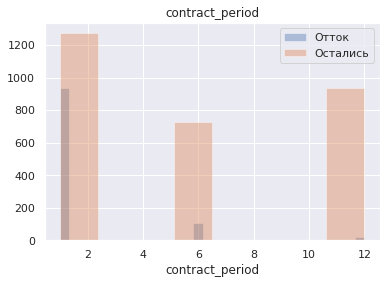

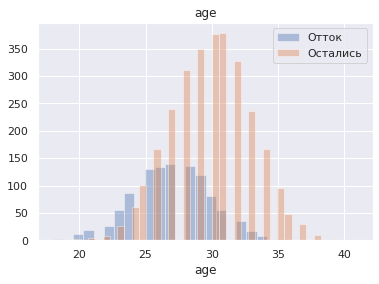

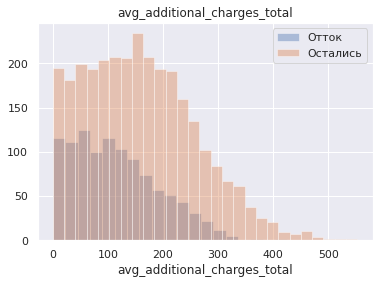

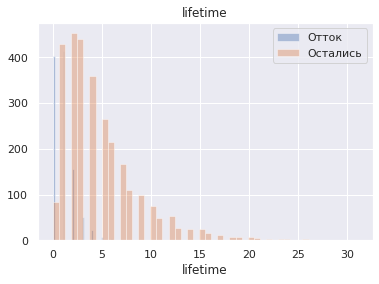

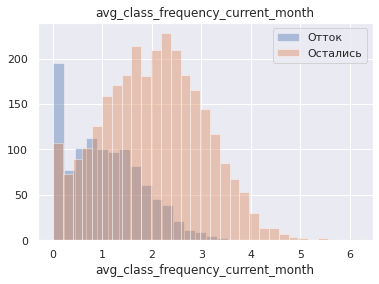

In [9]:
# построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался
churn_1 = df[df['churn'] == 1]
churn_0 = df[df['churn'] == 0]
indicators_1 = non_bi
indicators_2 = bi

%matplotlib inline
for i in indicators_1:
    sns.set(style="darkgrid")
    ax = sns.distplot(churn_1[i], kde=False)
    ax = sns.distplot(churn_0[i], kde=False)
    plt.title(i)
    plt.legend(labels=['Отток', 'Остались'])
    plt.show()

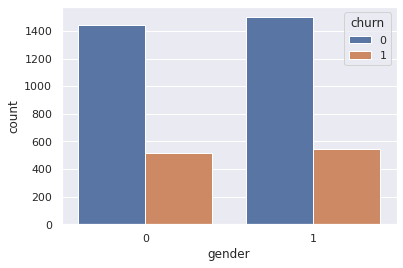

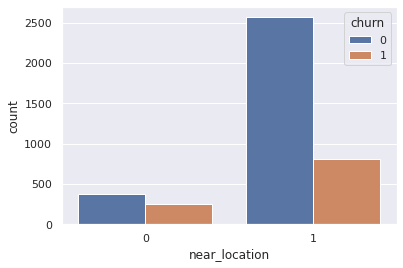

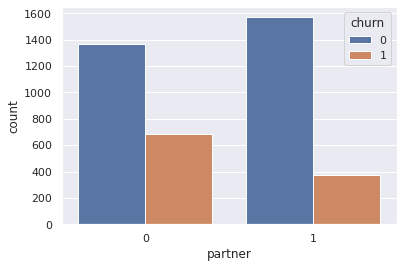

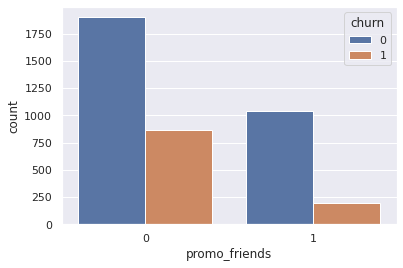

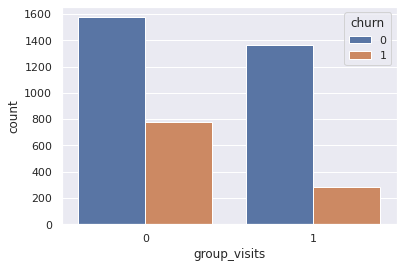

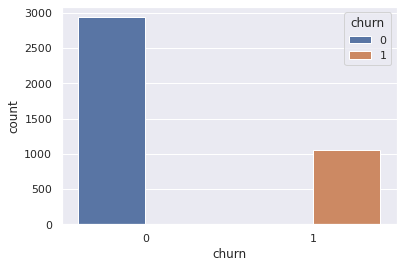

In [10]:
%matplotlib inline
for i in indicators_2:
    sns.set(style="darkgrid")
    ax = sns.countplot(x=i, data=df, hue='churn')
    plt.show()

По графикам видим, что в отток чаще попадают:
- Клиенты с меньшей длительностью абонимента;
- Более молодые клиенты;
- Те, кто меньше тратит на доп.услуги;
- Те, кто занимается в клубе недавно;
- Те, кто реже ходил за последний месяц.
- Живущие далеко от Фитнес-центра;
- Пришедшие не от организации партнера;
- Пришедшие не по рекомендации друга;
- Те, кто реже посещает групповые занятия.

In [11]:
# построим матрицу корреляций и отобразим ее
cm = df.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


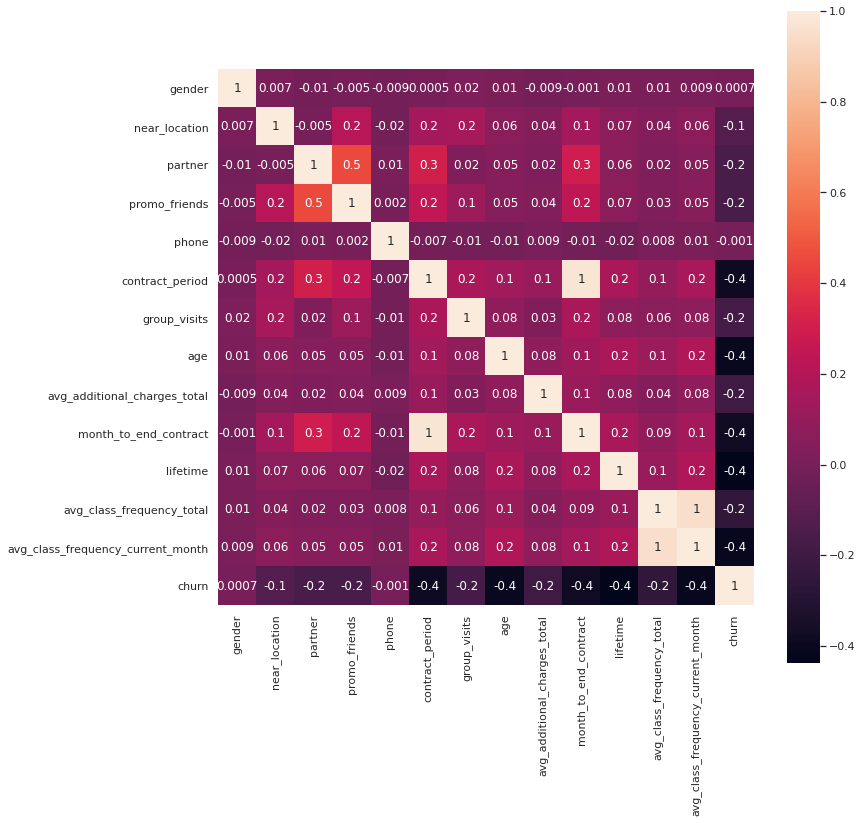

In [12]:
# построим heatmap для матрицы корреляций
plt.subplots(figsize=(12,12))
sns.heatmap(cm, annot=True, square=True, fmt='.1g')
plt.show()

По матрице корреляций видим, что у нас есть 2 пары признаков, которые сильно коррелируют внутри пары и при обучении модели создадут мультиколлинераность. Это 'month_to_end_contract' и 'contract_period' с коэффицентом корреляции 0.97, а также 'avg_class_frequency_total' и 'avg_class_frequency_current_month' с коэффицентом корреляции 0.95. Из графиков выше также уберем анализ этих показателей, чтобы не дублировать выводы.

**Вывод**

По средним значениям признаков видим и графикам мы видим похожую картину и можем сделать вывод, что в отток чаще попадают следующие клиенты: 
- те, кто живет дальше от Фитнес-клуба;
- кто не явяляется сотрудником компании-партнёр;
- кто не был записан в рамках акции «приведи друга»;
- с небольшой длительность текущего действующего абонемента;
- кто реже ходит на групповые занятия;
- кто меньше тратит на доп.услуги;
- кто ходит в клуб меньше времени с момента первого обращения;
- кто реже ходит в Фитнес-клуб.

Здесь можно заметить, что дольше остаются клиенты, у которых изначально высокая лояльность, например, за счет того, что они пришли по приглащению друга или имеют скидки от компании-партнера. 

Также высокая лояльность у клиентов, которые тратят много на доп.услуги, например, им нравятся коктейли в фитнесс-баре, конкретный тренер или специалист по массажу.

Часто остаются надолго и клиенты, которые регуляно ходят на групповые занятия, возможно за счет того, что формируется круг общения, нравится тренер и т.п.

Клиенты реже уходят в отток, когда много лет ходят в один и тот же клуб, у них уже сформирована сильная привычка и чувство принадлежности.

Также очевиден более редкий уход в отток клиентов, которые живут или работают рядом с фитнес-центром.

####  Модель прогнозирования оттока клиентов

В данном пункте обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.

По матрице корреляций мы определили, что есть 2 признака, которые создают мультиколлинеарность модели. Наличие данных признаков может стать причиной переобучаемости модели и привести к неверному результату. Оставим по одному из коррелирующих признаков.

In [13]:
df.drop('month_to_end_contract', axis = 1, inplace = True)
df.drop('avg_class_frequency_total', axis = 1, inplace = True)

In [14]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# стандартизируем тестовую выборку
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.fit_transform(X_test)

In [15]:
# объявим функцию, которая будет обучать модель на тренировочной выборке и делать прогноз на валидационной
# оценим метрики accuracy, precision и recall модели на валидационной выборке
def make_prediction(m, X_train_st, y_train, X_test_st, y_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test) 
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1-мера: {:.2f}'.format(f1_score(y_test, predictions)))

In [16]:
# необходимые модели обучения поместим в список
models = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(n_estimators = 100, random_state = 0)
]
# с помощью цикла применим функцию к списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(solver='liblinear')
Accuracy: 0.90
Precision: 0.79
Recall: 0.79
F1-мера: 0.79
RandomForestClassifier(random_state=0)
Accuracy: 0.90
Precision: 0.81
Recall: 0.75
F1-мера: 0.78


**Вывод**

Доля верно угаданных ответов из всех прогнозов (Accuracy) в обоих случаях равная и достаточно высокая, здесь обе модели сработали хорошо.

Доля правильных ответов только среди целевого класса (Precision) у LogisticRegression немного ниже, чем у RandomForestClassifier.

А вот показатель количества реальных объектов оттока (Recall), которые мы смогли обнаружить с помощью модели LogisticRegression выше, чем в случае применения модели RandomForestClassifier.

Получаем, что метрика Accuracy одинаковая, а две другие метрики отличаются в разные стороны.

Так как precision и recall направлены на избежание противоположных рисков, я также рассчитала F1, которая учитывает баланс между этими метриками. 

Ключевыми параметрами для прогнозирования оттока является параметр Recall. За счет более высокого Recall и F1 делаем выбор в пользу модели LogisticRegression.

####  Кластеризация клиентов

In [17]:
# отложим в сторону столбец с оттоком и стандартизируем данные
df_1 = df.drop('churn', axis=1)
X_sc = scaler.fit_transform(df_1)

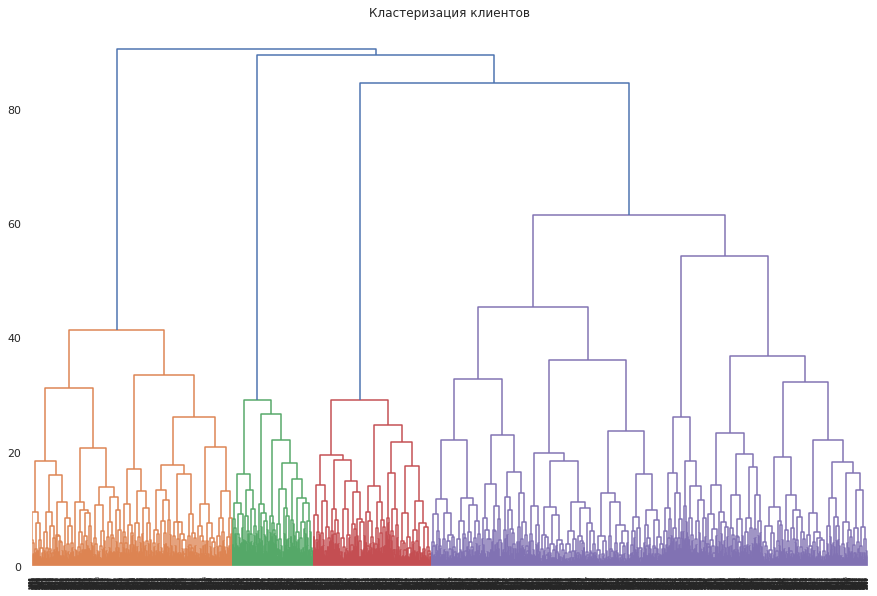

In [18]:
# построим матрицу расстояний и отрисуем дендрограмму
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show() 

На основании полученного графика можно выделить 5 кластеров (если провети горизонтальную линию на уровне 59 по оси Y).

In [19]:
# обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5 (по заданию и согласно выводу выше) и фиксируем значение random_state
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [20]:
# сохраняем метки кластера в поле датасетов (исходного и измененного)
df_1['cluster'] = labels
df['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = df_1.groupby('cluster').mean()
clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month
cluster,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967


Средние значения выделенных кластеров нам говорят о том, что для каждого выделяются определенные признаки:

0 кластер - живут или работают рядом, пришли от компании-партнера или по приглашению друга;

1 кластер - не живут и не работают рядом, некоторые пришли от компании-партнера, занимаются в фитнес-центре недавно, редко ходят на групповые;

2 кластер - живут или работают рядом, занимаются в фитнес-центре недавно, редко ходят на групповые;

3 кластер - живут или работают рядом, давно занимаются в фитнес-центре, много тратят на доп.услуги;

4 кластер - живут или работают рядом, давно занимаются в фитнес-центре (но меньше, чем 3 кластер), много тратят на доп.услуги но меньше, чем 3 кластер).

Здесь можно сделать вывод, что 1 кластер "залетные" клиенты, по кластеру 2 тоже есть сомнения. В этих кластерах наименее лояльные клиенты по входным признакам.

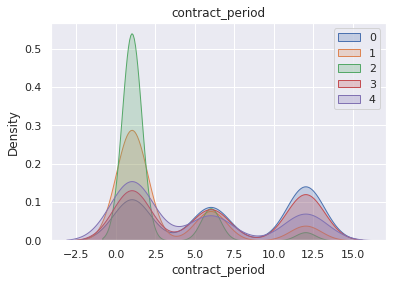

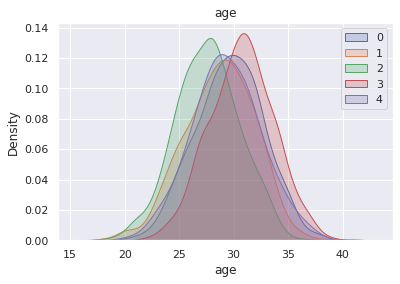

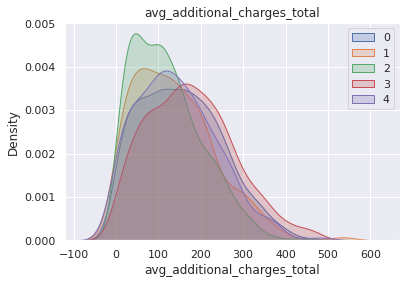

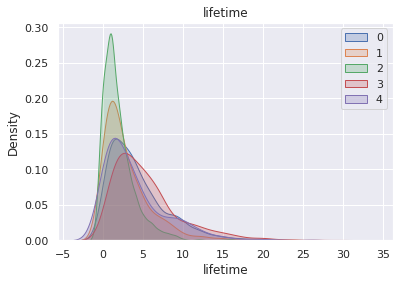

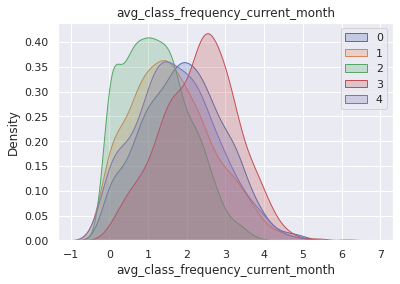

In [21]:
# построим распределения не бинарных признаков для кластеров
    
clusterss = clusters.reset_index()['cluster']
for i in indicators_1:
    for j in clusterss:
        sns.kdeplot(df_1[df_1['cluster']==j][i], label=j, shade=True)
        plt.title(i)
        plt.legend()
    plt.show()

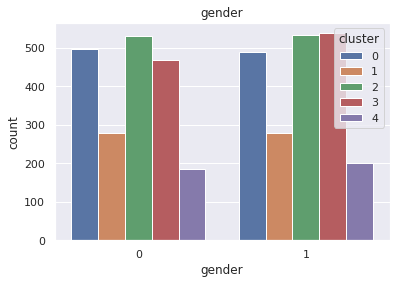

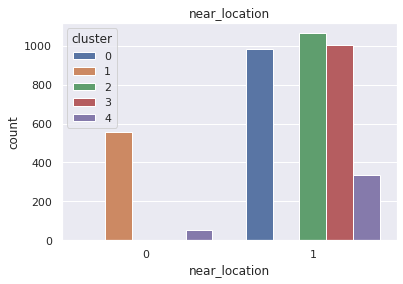

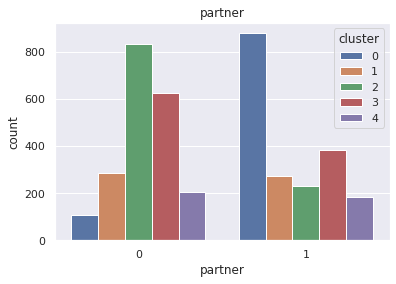

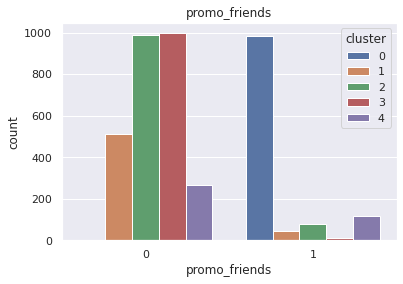

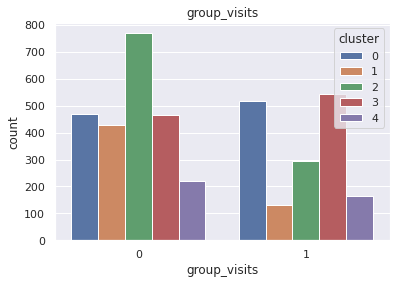

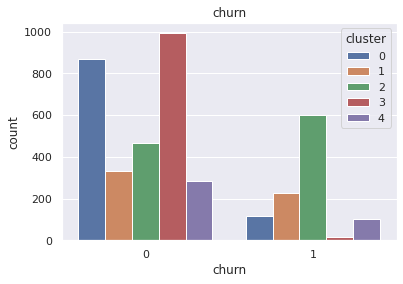

In [22]:
# построим распределения бинарных признаков для кластеров
    
clusterss = clusters.reset_index()['cluster']
for i in indicators_2:
    sns.countplot(data=df_1, x=df[i], hue='cluster')
    plt.title(i)
    plt.show()

По графикам также можно сделать вывод, что 1 и 2 кластеры это наименее "лояльные" клиенты:

1 кластер - не живут и не работают рядом, ходят совсем недавно, 

2 кластер - живут или работают рядом, но пришли не по приглашению компании партера или друга, ходят совсем недавно, ходят редко, мало ходят на групповые.

In [23]:
# для каждого полученного кластера посчитаем долю оттока
df.groupby('cluster').agg({'churn':'mean'})

,churn
cluster,
0,0.119797
1,0.403226
2,0.563910
3,0.014896
4,0.266839


Исходя из доли оттока в каждом кластере можем сделать вывод, что надежными кластерами являются 0,3,4. Кластеры 1 и 2 более склонны к оттоку. В кластере 2 более половины людей уходит в отток. В 4 кластере также есть небольшая вероятность оттока, хоть, в целом, кластер является надежным.

**Вывод**

Исходя из анализа, проведенного в данном пункте можно сделать вывод о том, что кластеры 1 и 2 более склонны к оттоку, а кластеры 0, 3, 4 более надежны, при чем, наиболее надежным является 3 кластер, в который входят самые преданные и лояльные клиенты (живут или работают рядом, давно занимаются в фитнес-центре, много тратят на доп.услуги).

####  Выводы и рекомендации

В результате проведенного исследования было выделено 5 кластеров клиентов, которые можно разделить на 2 группы: склонные к оттоку и надежные.

К оттоку склонные наименее лояльные клиенты:
- 1 кластер - не живут и не работают рядом, ходят совсем недавно;
- 2 кластер - живут или работают рядом, но пришли не по приглашению компании партера или друга, ходят совсем недавно, ходят редко, мало ходят на групповые.

У этих групп клиентов слабо сформирована привязанность к конкретному фитнес-центру.

Надежными клиентами являются: 
- 0 кластер - живут или работают рядом, пришли от компании-партнера или по приглашению друга;
- 3 кластер - живут или работают рядом, давно занимаются в фитнес-центре, много тратят на доп.услуги;
- 4 кластер - живут или работают рядом, давно занимаются в фитнес-центре (но меньше, чем 3 кластер), много тратят на доп.услуги но меньше, чем 3 кластер).

При чем, наиболее надежным является 3 кластер, в который входят самые преданные и лояльные клиенты.
В 4 кластере также есть небольшая вероятность оттока, хоть, в целом, кластер является надежным.

Таким образом, нам следует обратить внимание на клиентов 1 и 2 кластера. Переместить их в другие кластеры поможет повышение лояльности. Также нам необходимо следить за 4 кластером и не давать клиентам уходить из него в отток.

Исходя из этого, можно дать следующие рекомендации:
1. Введение скидки для новых клиентов (изначальное повышение лояльности);
2. Работа по продвижению групповых занятий (формирование круг общения, чувства принадлежности), здесь может быть просто рассказ менеджера клиенту о занятиях, вывеска на ресепшн, размещение информации в приложении клуба;
3. Введение системы скидок за преданность, а именно неоднократное продление абонимента;
4. Система скидок на первое использование доп.услуг: первый коктейль в фитнес-баре, первый сеанс массажа или занятие с тренером.